In [1]:
# !git clone https://github.com/oCt-raiN/Leather_QC.git

In [2]:
import os

In [3]:
# !unzip /content/drive/MyDrive/leather_dataset/leather_dataset.zip

In [4]:
# one time for filename change

# dir = "/content/Leather_Defect_Classification/"
# for i in os.scandir(dir):
#   for j in os.scandir(i):
#     if j.is_file():
#       os.rename(j.path,j.path.replace(" ","_"))

In [5]:
# !zip -r leather_dataset.zip /content/Leather_Defect_Classification/

In [6]:
# !mv /content/leather_dataset.zip /content/drive/MyDrive/leather_dataset/

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./Leather_Defect_Classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(200).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(225).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(369).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(471).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(434).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(507).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(75).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(347).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(246).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(414).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(218).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(492).jpg
./Leather_Defect_Classification/Folding_marks/Folding_marks_01_(496).jpg
./Leather_Defect_Classification/Folding_marks/Foldin

In [8]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

2023-10-05 08:37:26.474712: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 08:37:26.642318: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-05 08:37:26.642385: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-05 08:37:26.642418: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-05 08:37:26.694672: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 08:37:26.695553: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [9]:
train_dir = "./Leather_Defect_Classification"

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
   color_mode='grayscale',
  subset="training",
  seed=123,
  image_size=(227, 227),
  batch_size=64)

Found 3600 files belonging to 6 classes.
Using 2880 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
    color_mode='grayscale',
  seed=123,
  image_size=(227, 227),
  batch_size=64)

Found 3600 files belonging to 6 classes.
Using 720 files for validation.


In [11]:
train_ds.get_single_element

<bound method DatasetV2.get_single_element of <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 227, 227, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>>

In [12]:
class_names = train_ds.class_names
print(class_names)

['Folding_marks', 'Grain_off', 'Growth_marks', 'loose_grains', 'non_defective', 'pinhole']


(227, 227, 1)
(227, 227, 1)
(227, 227, 1)
(227, 227, 1)
(227, 227, 1)
(227, 227, 1)
(227, 227, 1)
(227, 227, 1)
(227, 227, 1)


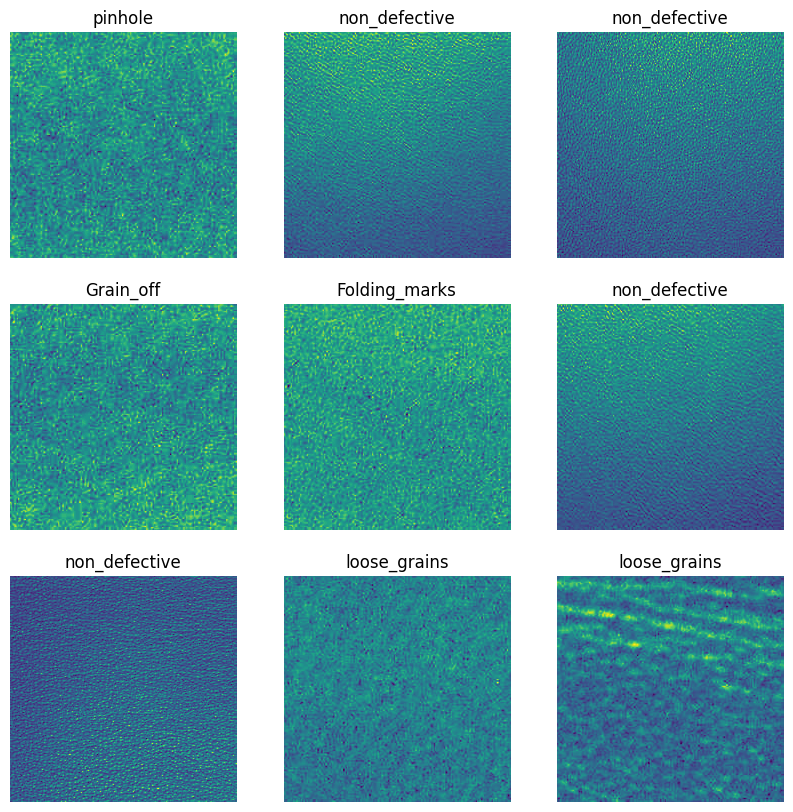

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    print(images[i].shape)
    plt.imshow(images[i].numpy().astype("uint8"))

    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 227, 227, 1)
(64,)


In [15]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.4666667 0.6156863


In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
num_classes = 6
from keras import applications

# model = tf.keras.Sequential([
#   tf.keras.layers.Rescaling(1./255),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_classes)
# ])
img_height=227
img_width=227
# base_model = applications.resnet50.ResNet50(weights= None, include_top=False,
#input_shape= (img_height,img_width,1))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16

# define input size
input_shape = (227, 227, 1)

# define number of output classes
num_classes = 6

# load pre-trained VGG16 model with ImageNet weights
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# create the model
model = Sequential()

# add convolutional layers to replicate grayscale image across three channels
model.add(Conv2D(3, (3, 3), padding='same', input_shape=input_shape))

# add VGG16 layers
for layer in vgg16.layers:
    model.add(layer)

# freeze pre-trained layers
for layer in model.layers:
    layer.trainable = False

# add new classification layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 227, 227, 3)       30        
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     1

In [20]:
from keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.h5',
                                      monitor='val_loss',
                                      verbose=1,
                                      save_best_only=True,
                                      save_weights_only=True,
                                      mode='auto',
                                      period=1)

# model.fit(x_train, y_train,
#           epochs=10,
#           batch_size=32,
#           validation_data=(x_val, y_val),
#           callbacks=[checkpoint_callback])

# model=resnet50()
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)

In [21]:
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5,
    callbacks=[checkpoint_callback]
)

Epoch 1/5


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-10-05 08:37:38.695335: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 844251136 exceeds 10% of free system memory.
2023-10-05 08:37:39.097376: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 844251136 exceeds 10% of free system memory.
2023-10-05 08:37:42.550955: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 418414592 exceeds 10% of free system memory.
2023-10-05 08:37:43.939687: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 418414592 exceeds 10% of free system memory.


 1/45 [..............................] - ETA: 19:20 - loss: 3.0450 - accuracy: 0.1562

2023-10-05 08:38:03.896957: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 844251136 exceeds 10% of free system memory.


12/45 [=======>......................] - ETA: 13:19 - loss: 35.8391 - accuracy: 0.2591

In [ ]:
history=history.history

In [ ]:

plt.plot(history['loss'], label='Training Loss')

# Plot validation loss if available
if 'val_loss' in history:
    plt.plot(history['val_loss'], label='Validation Loss')

# Add plot labels and legend
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.ylim(0, 10)


# Show plot
plt.show()

In [ ]:
model.save('leather_defect_model_1', save_format='tf')
